In [49]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv('../data/Train_call.txt',delimiter = '\t')
labels = pd.read_csv('../data/Train_clinical.txt',delimiter = '\t')

In [51]:
data.head()

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1,2927,43870,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1,85022,216735,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1,370546,372295,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1,471671,786483,5,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1,792533,907406,13,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0


In [52]:
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Chromosome,1,1,1,1,1,1,1,1,1,1,...,23,23,23,23,23,23,23,23,23,23
Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,2481927,...,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,2562342,...,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
Nclone,3,4,4,5,13,96,45,4,104,14,...,159,20,6,64,5,57,4,55,5,43
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [53]:
data = data[4:]
data

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
Array.34,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.67,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.24,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
Array.22,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [54]:
data = data.reset_index()
data

,index,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [55]:
data.rename(columns={'index':'Sample'}, inplace=True)
data.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [56]:
labels.head()

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg


In [57]:
# Combine labels and instances
combined = pd.merge(data,labels,on='Sample',)
combined

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,HR+


In [58]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [107]:
X = combined.iloc[:,1:2835]
y = combined['Subgroup']

combined.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg


In [108]:
# check if class lables are balanced or not
y.value_counts()

HR+           36
HER2+         32
Triple Neg    32
Name: Subgroup, dtype: int64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=4)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (75, 2834)
X_test (25, 2834)
y_train (75,)
y_test (25,)


# Feature selection 

### multinomial logistic regression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

Optimal number of features : 33


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


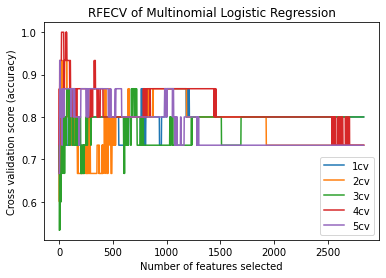

In [62]:
# Create the RFE object and compute a cross-validated score.
lr = LogisticRegression(multi_class='multinomial')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv_lr = RFECV(
    estimator=lr,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv_lr.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv_lr.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_lr.grid_scores_) + min_features_to_select),
    rfecv_lr.grid_scores_,
)
plt.title("RFECV of Multinomial Logistic Regression")
plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
plt.show()

In [ ]:
# x_train_new_lr = X_train.iloc[:, rfecv_lr.support_]
# x_train_new_lr

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

Optimal number of features : 2657


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


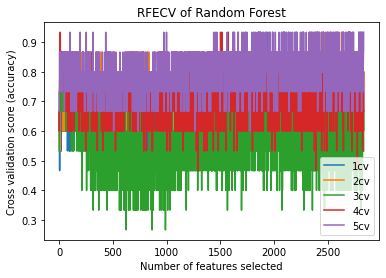

In [64]:
# Create the RFE object and compute a cross-validated score.
rf = RandomForestClassifier(random_state = 42)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv_rf = RFECV(
    estimator=rf,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv_rf.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv_rf.n_features_)

# Plot number of features VS. cross-validation scores
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_rf.grid_scores_) + min_features_to_select),
    rfecv_rf.grid_scores_,
)
plt.title("RFECV of Random Forest")
plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
plt.show()

### XGboost

In [101]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 

In [114]:
# label encode y for xgboost
lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y_train = lc.transform(y_train)


In [121]:
lc_y_train = pd.DataFrame(lc_y_train)
lc_y_train.rename(columns={'0':'Subgroup'})
lc_y_train

,0
0,0
1,1
2,0
3,0
4,1
...,...
70,2
71,1
72,1
73,2


In [84]:
# Create the RFE object and compute a cross-validated score.
xgb = XGBClassifier(random_state=42, enable_categorical=True)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv_xgb = RFECV(
    estimator=xgb,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv_xgb.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv_xgb.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_xgb.grid_scores_) + min_features_to_select),
    rfecv_xgb.grid_scores_,
)
plt.title("RFECV of XGBoost")
plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
plt.show()

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

## GridSearchCV 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

In [ ]:
# define model
model = LogisticRegression(multi_class='multinomial')

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# print winning set of hyperparameters
from pprint import pprint
pprint(result.best_estimator_.get_params())

In [ ]:
corr = X_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr